##### Il dataset iniziale aveva una dimensione di quasi 2 GB. Per una questione di ottimizzazione di tempo ho estratto solo il 2% del contenuto con il seguente comando:
df = df.sample(frac=0.02, random_state=42)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path ='yellow_tripdata_2016-03.csv'
df = pd.read_csv(file_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24422 entries, 0 to 24421
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             24422 non-null  int64  
 1   VendorID               24422 non-null  int64  
 2   tpep_pickup_datetime   24422 non-null  object 
 3   tpep_dropoff_datetime  24422 non-null  object 
 4   passenger_count        24422 non-null  int64  
 5   trip_distance          24422 non-null  float64
 6   pickup_longitude       24422 non-null  float64
 7   pickup_latitude        24422 non-null  float64
 8   RatecodeID             24422 non-null  int64  
 9   store_and_fwd_flag     24422 non-null  object 
 10  dropoff_longitude      24422 non-null  float64
 11  dropoff_latitude       24422 non-null  float64
 12  payment_type           24422 non-null  int64  
 13  fare_amount            24422 non-null  float64
 14  extra                  24422 non-null  float64
 15  mt

## Pulizia dei dati

In [4]:
# Elimino la colonna Unnamed:0 e store_and_fwd_flag non necessarie per le analisi
df = df.drop(columns=['Unnamed: 0', 'store_and_fwd_flag'])

In [5]:
# Rimuovo valori nulli
df.dropna()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-07 22:55:52,2016-03-07 23:15:53,1,9.70,-73.870903,40.773708,1,-73.978516,40.688320,2,28.5,0.5,0.5,0.00,0.0,0.3,29.80
1,1,2016-03-30 01:56:55,2016-03-30 02:15:51,1,9.80,-73.989517,40.729168,1,-73.849831,40.730572,1,28.0,0.5,0.5,5.00,0.0,0.3,34.30
2,1,2016-03-23 18:51:46,2016-03-23 19:13:29,1,3.20,-73.995781,40.738701,1,-73.983185,40.775146,1,15.5,1.0,0.5,3.45,0.0,0.3,20.75
3,1,2016-03-09 17:37:32,2016-03-09 17:49:00,1,2.30,-73.968643,40.764065,1,-73.952240,40.792309,2,10.0,1.0,0.5,0.00,0.0,0.3,11.80
4,2,2016-03-29 19:46:34,2016-03-29 19:58:58,5,3.34,-74.009537,40.706291,1,-73.988403,40.720081,1,13.0,1.0,0.5,2.96,0.0,0.3,17.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24417,2,2016-03-25 19:32:11,2016-03-25 19:44:11,1,1.18,-73.988892,40.744698,1,-73.981667,40.758808,1,9.0,1.0,0.5,1.00,0.0,0.3,11.80
24418,1,2016-03-28 12:27:22,2016-03-28 12:36:49,1,0.80,-73.984894,40.764599,1,-73.973030,40.764339,1,7.5,0.0,0.5,1.65,0.0,0.3,9.95
24419,1,2016-03-10 09:16:44,2016-03-10 09:24:47,1,1.10,-73.957458,40.779953,1,-73.968040,40.764874,1,7.0,0.0,0.5,1.56,0.0,0.3,9.36
24420,1,2016-03-20 21:37:19,2016-03-20 21:59:46,1,7.50,-73.985794,40.742744,1,-73.945480,40.812092,1,25.0,0.5,0.5,7.85,0.0,0.3,34.15


In [6]:
# Converto le colonne delle dati nel tipo datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24422 entries, 0 to 24421
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               24422 non-null  int64         
 1   tpep_pickup_datetime   24422 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  24422 non-null  datetime64[ns]
 3   passenger_count        24422 non-null  int64         
 4   trip_distance          24422 non-null  float64       
 5   pickup_longitude       24422 non-null  float64       
 6   pickup_latitude        24422 non-null  float64       
 7   RatecodeID             24422 non-null  int64         
 8   dropoff_longitude      24422 non-null  float64       
 9   dropoff_latitude       24422 non-null  float64       
 10  payment_type           24422 non-null  int64         
 11  fare_amount            24422 non-null  float64       
 12  extra                  24422 non-null  float64       
 13  m

In [7]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
VendorID,24422.0,1.527475,1.0,1.0,2.0,2.0,2.0,0.499255
tpep_pickup_datetime,24422,2016-03-16 08:39:53.657235200,2016-03-01 00:07:19,2016-03-08 15:22:24.500000,2016-03-16 11:05:58,2016-03-24 00:20:31.750000128,2016-03-31 23:59:56,NaN
tpep_dropoff_datetime,24422,2016-03-16 08:55:38.831872768,2016-03-01 00:15:35,2016-03-08 15:38:40.750000128,2016-03-16 11:25:31,2016-03-24 00:32:52.750000128,2016-04-01 23:26:07,NaN
passenger_count,24422.0,1.649292,1.0,1.0,1.0,2.0,6.0,1.302167
trip_distance,24422.0,2.956031,0.0,1.0,1.7,3.2,55.95,3.589359
pickup_longitude,24422.0,-72.883285,-74.178917,-73.991898,-73.981583,-73.966919,0.0,8.915098
pickup_latitude,24422.0,40.150162,0.0,40.736301,40.752991,40.7675,40.934795,4.91121
RatecodeID,24422.0,1.041807,1.0,1.0,1.0,1.0,99.0,0.686414
dropoff_longitude,24422.0,-72.904226,-74.395508,-73.991379,-73.979622,-73.962158,0.0,8.829243
dropoff_latitude,24422.0,40.162674,0.0,40.734423,40.753403,40.769058,41.027439,4.864064


In [8]:
# Elimino le corse che non hanno una longitudine, latitudine e trip_distance pari a 0
anomalous_rows = df[
    ((df['pickup_longitude'] == 0) & (df['pickup_latitude'] == 0)) |
    ((df['dropoff_longitude'] == 0) & (df['dropoff_latitude'] == 0)) |
    (df['trip_distance'] == 0)
]
df = df.drop(index=anomalous_rows.index)

In [9]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
VendorID,23927.0,1.532536,1.0,1.0,2.0,2.0,2.0,0.498951
tpep_pickup_datetime,23927,2016-03-16 08:41:21.209930240,2016-03-01 00:07:19,2016-03-08 15:45:37,2016-03-16 10:57:11,2016-03-24 00:03:17,2016-03-31 23:59:56,NaN
tpep_dropoff_datetime,23927,2016-03-16 08:57:13.779872,2016-03-01 00:15:35,2016-03-08 15:57:17,2016-03-16 11:16:29,2016-03-24 00:24:27,2016-04-01 23:26:07,NaN
passenger_count,23927.0,1.654783,1.0,1.0,1.0,2.0,6.0,1.307974
trip_distance,23927.0,2.97759,0.01,1.0,1.7,3.2,55.95,3.598336
pickup_longitude,23927.0,-73.973861,-74.178917,-73.992054,-73.98188,-73.968075,-73.687096,0.037732
pickup_latitude,23927.0,40.750911,40.588928,40.737434,40.753548,40.767834,40.934795,0.027747
RatecodeID,23927.0,1.036695,1.0,1.0,1.0,1.0,99.0,0.67872
dropoff_longitude,23927.0,-73.973572,-74.395508,-73.991508,-73.979958,-73.96331,-73.548027,0.035624
dropoff_latitude,23927.0,40.751731,40.543594,40.735783,40.75404,40.7694,41.027439,0.032176


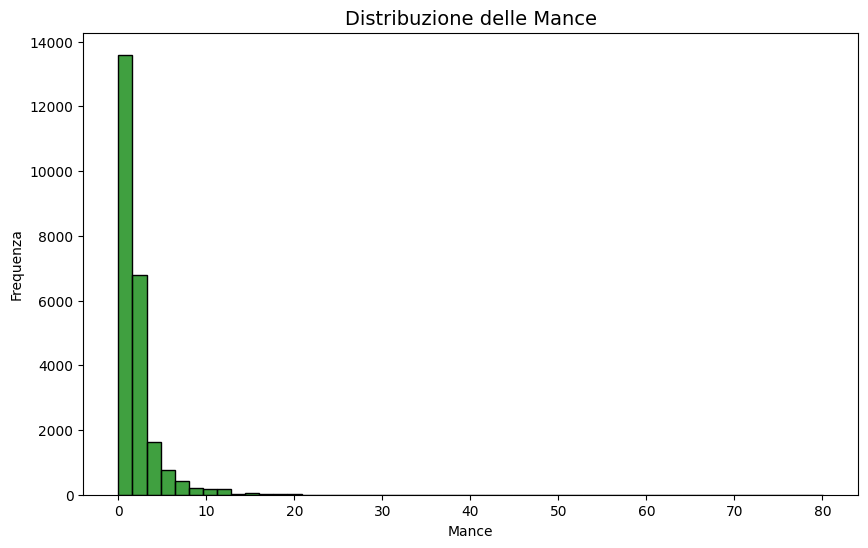

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['tip_amount'], bins=50, color='green')
plt.title('Distribuzione delle Mance', fontsize=14)
plt.xlabel('Mance')
plt.ylabel('Frequenza')
plt.show()

### Distribuzione della distanza dei viaggi

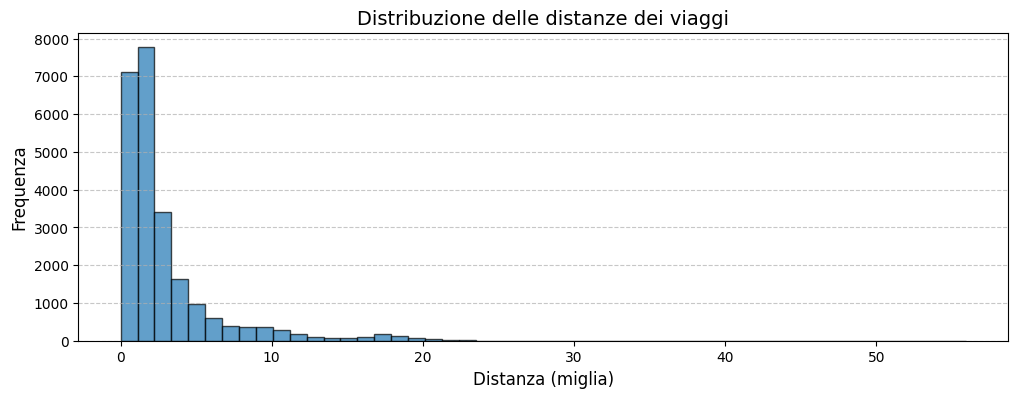

In [11]:
plt.figure(figsize=(12, 4))
df['trip_distance'].plot(kind='hist', bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribuzione delle distanze dei viaggi', fontsize=14)
plt.xlabel('Distanza (miglia)', fontsize=12)
plt.ylabel('Frequenza', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Distribuzione degli importi totali

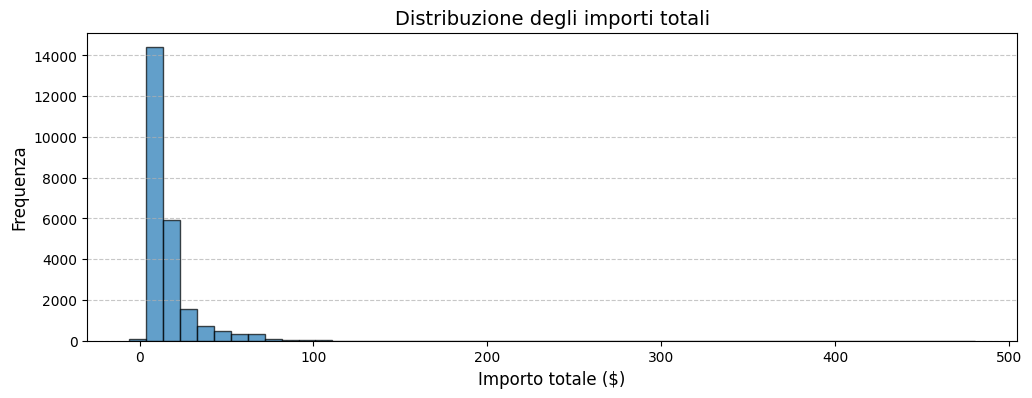

In [12]:
plt.figure(figsize=(12, 4))
df['total_amount'].plot(kind='hist', bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribuzione degli importi totali', fontsize=14)
plt.xlabel('Importo totale ($)', fontsize=12)
plt.ylabel('Frequenza', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
# Creo 2 colonne nuove, ora e giorno della settimana in cui e avvenuta la corsa
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()


C:\Users\c3rn0\AppData\Local\Temp\ipykernel_28800\2427131953.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df, palette='viridis')


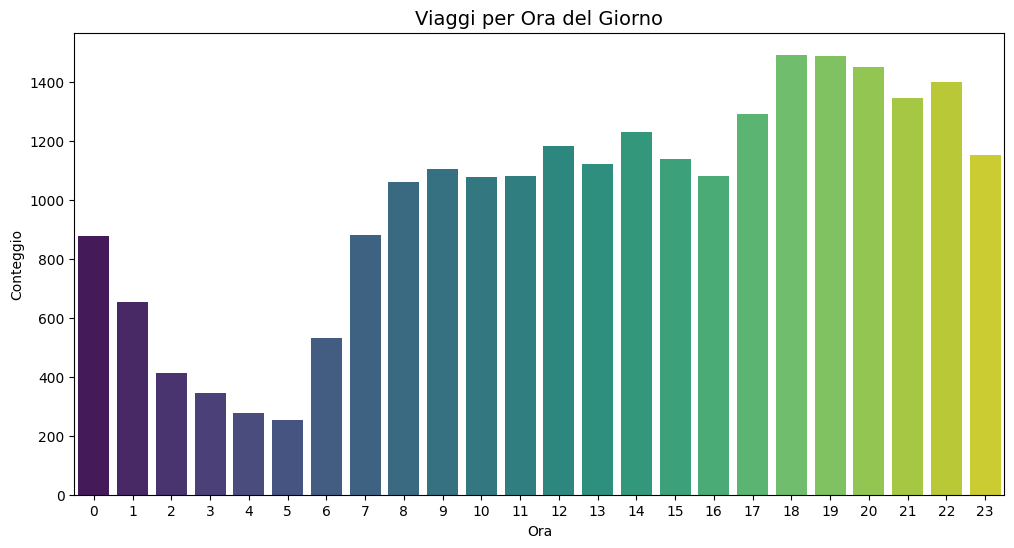

In [14]:
# Analizzo i viaggi per ora
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=df, palette='viridis')
plt.title('Viaggi per Ora del Giorno', fontsize=14)
plt.xlabel('Ora')
plt.ylabel('Conteggio')
plt.show()

C:\Users\c3rn0\AppData\Local\Temp\ipykernel_28800\2054838145.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')


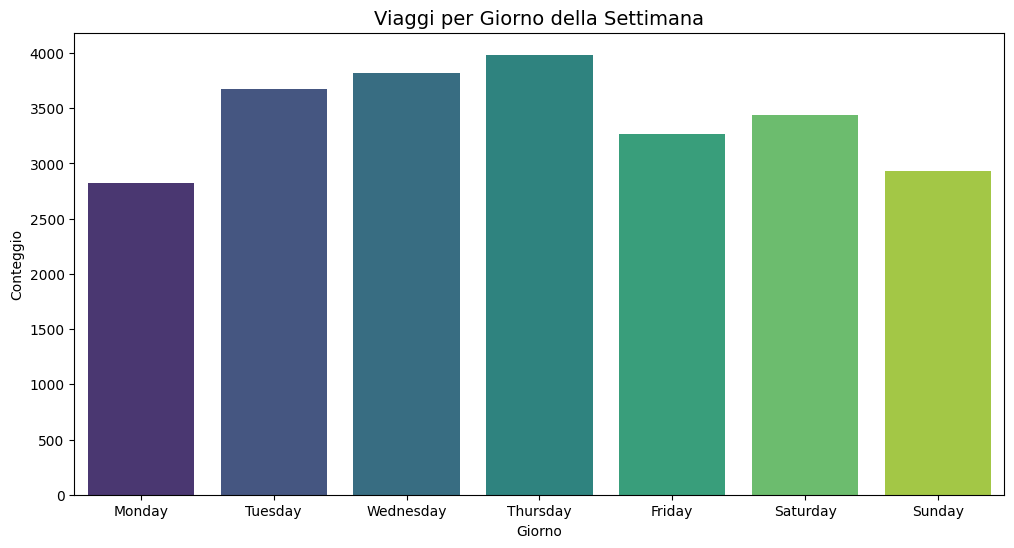

In [15]:
# Analizzo i viaggi per giorno della settimana
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Viaggi per Giorno della Settimana', fontsize=14)
plt.xlabel('Giorno')
plt.ylabel('Conteggio')
plt.show()

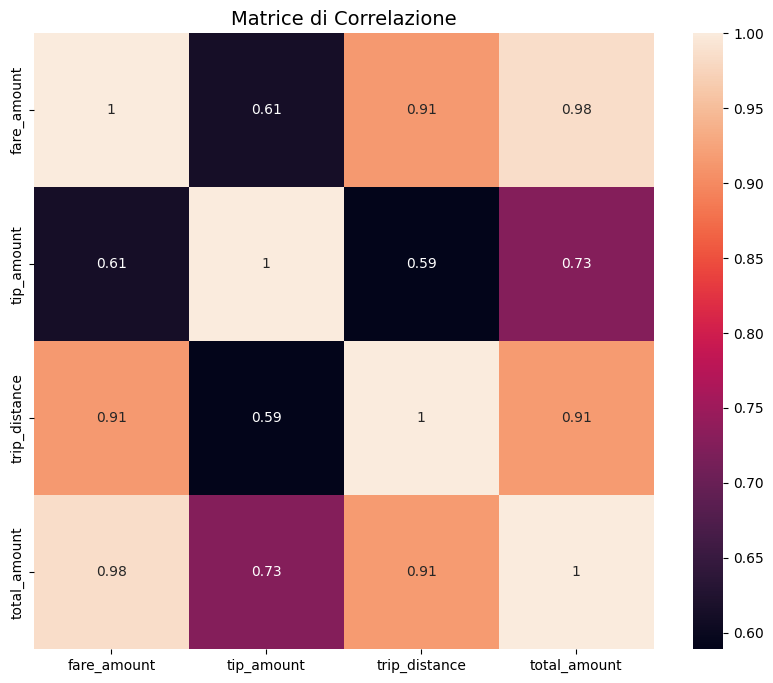

In [16]:
# Matrice di correlazione
plt.figure(figsize=(10, 8))
sns.heatmap(df[['fare_amount', 'tip_amount', 'trip_distance', 'total_amount']].corr(), annot=True)
plt.title('Matrice di Correlazione', fontsize=14)
plt.show()

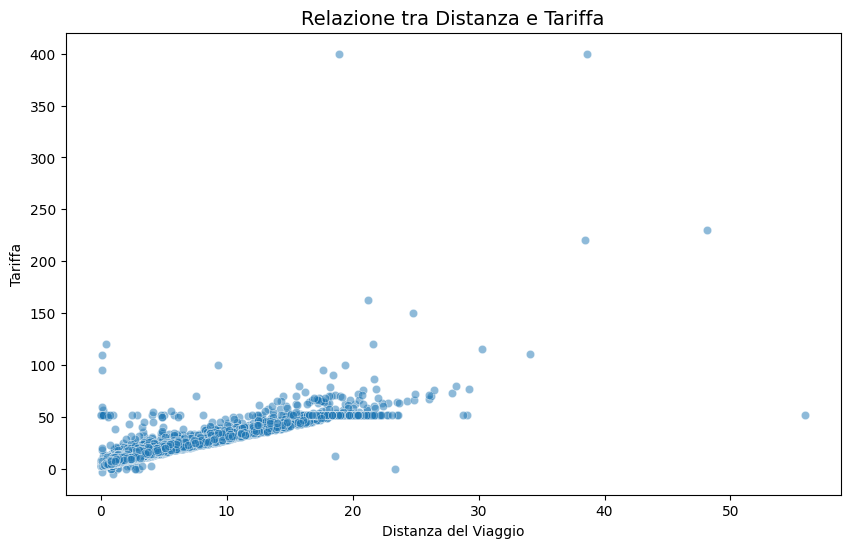

In [17]:
# Relazione tra distanza e tariffa
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df, alpha=0.5)
plt.title('Relazione tra Distanza e Tariffa', fontsize=14)
plt.xlabel('Distanza del Viaggio')
plt.ylabel('Tariffa')
plt.show()

## Mappe di Calore per Prelievo e Rilascio

In [18]:
import folium
from folium.plugins import HeatMap

# Filtro i dati per evitare outlier geografici
data_geo = df[(df['pickup_longitude'] > -75) & (df['pickup_longitude'] < -73) &
                (df['pickup_latitude'] > 40) & (df['pickup_latitude'] < 41)]

# Creo una mappa centrata su New York
ny_map = folium.Map(location=[40.779897, -73.968565], zoom_start=12)

# Aggiungo una mappa di calore per i punti di prelievo
heat_data = data_geo[['pickup_latitude', 'pickup_longitude']].dropna()
HeatMap(heat_data.values, radius=8).add_to(ny_map)

# Visualizza la mappa
ny_map


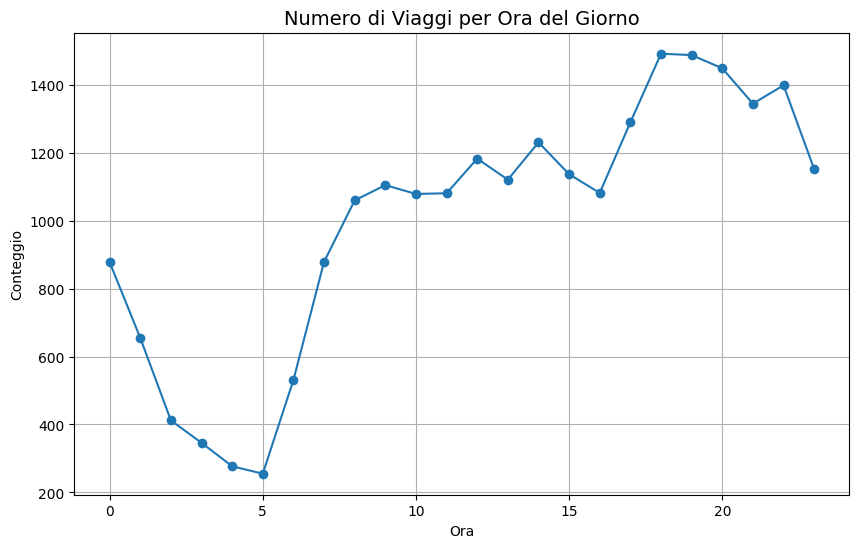

In [19]:
# Grafico lineare per i viaggi per ora
hourly_trips = df.groupby('hour').size()

plt.figure(figsize=(10, 6))
hourly_trips.plot(kind='line', marker='o')
plt.title('Numero di Viaggi per Ora del Giorno', fontsize=14)
plt.xlabel('Ora')
plt.ylabel('Conteggio')
plt.grid()
plt.show()


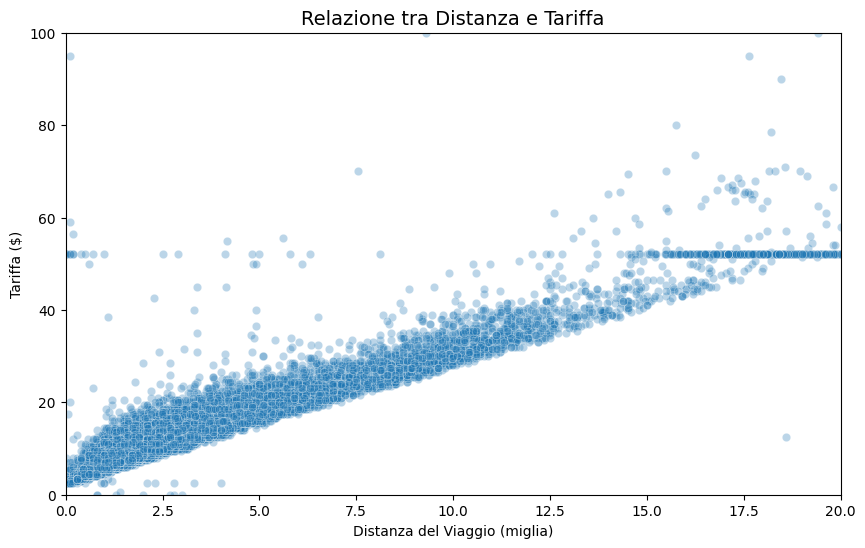

In [20]:
# Scatter plot tra distanza e tariffa
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df, alpha=0.3)
plt.title('Relazione tra Distanza e Tariffa', fontsize=14)
plt.xlabel('Distanza del Viaggio (miglia)')
plt.ylabel('Tariffa ($)')
plt.xlim(0, 20)  # Limita l'asse x per eliminare outlier
plt.ylim(0, 100)  # Limita l'asse y per eliminare outlier
plt.show()

#### Implemento un modello di regressione lineare per predire la tariffa ( fare_amount ) basandoci sulla distanza del viaggio ( trio_distance )

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Pulizia dei dati: consideriamo solo righe con valori validi
data_clean = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0)]

In [23]:
features = ['trip_distance']
target = 'fare_amount'

In [24]:
features

['trip_distance']

In [25]:
# Selezioniamo le variabili
X = data_clean[features]# Variabile indipendente
y = data_clean[target]# Variabile dipendente

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test_scaled)

In [30]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [31]:
print('\nModel Coefficients')
print('-------------------')
print(f'Coefficiente angolare (slope): {model.coef_[0]:.3f}')
print(f'Intercept: {model.intercept_:.3f}')


Model Coefficients
-------------------
Coefficiente angolare (slope): 10.205
Intercept: 12.736


In [32]:
print("\nModel Evaluation")
print("-----------------")
print(f"Mean Squared Error: {mse:.3f}")
print(f"R-squared Score: {r2:.3f}")


Model Evaluation
-----------------
Mean Squared Error: 14.116
R-squared Score: 0.875


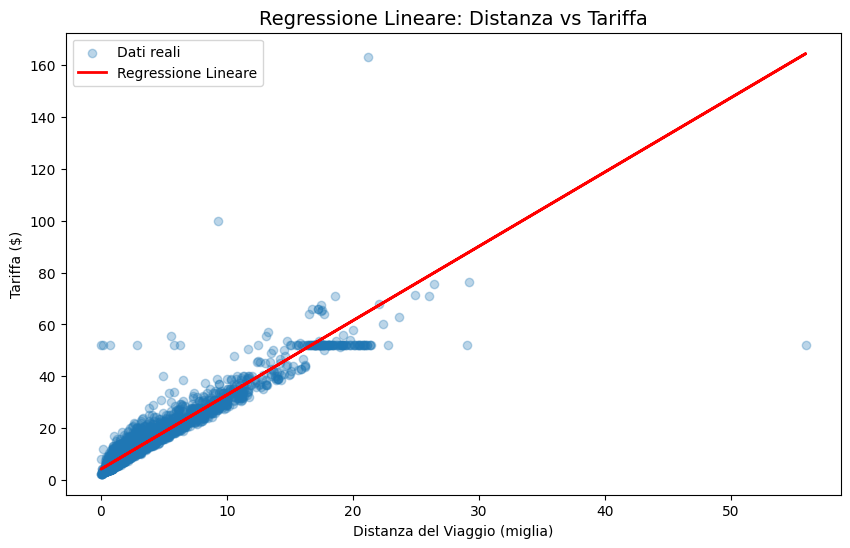

In [33]:
# Grafico dei risultati
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.3, label='Dati reali')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regressione Lineare')
plt.title('Regressione Lineare: Distanza vs Tariffa', fontsize=14)
plt.xlabel('Distanza del Viaggio (miglia)')
plt.ylabel('Tariffa ($)')
plt.legend()
plt.show()

## Predizione della modalita di pagamento tramite classificazione

#### Consideriamo solo carta di credito (1) e contanti (2)


In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

# Filtra i dati per includere solo le modalità di pagamento principali
data_class = data_clean[data_clean['payment_type'].isin([1, 2])] 

# Variabili indipendenti e dipendente
X = data_class[['trip_distance', 'fare_amount', 'tip_amount', 'hour']]  # Caratteristiche rilevanti
y = data_class['payment_type']  # Target: modalità di pagamento

# Codifica delle etichette (se non già numeriche)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Divisione in train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizzazione dei dati
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [35]:
# Modello di Logistic Regression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predizione e valutazione
y_pred_log = classifier.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred_log)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.97


<Figure size 800x600 with 0 Axes>

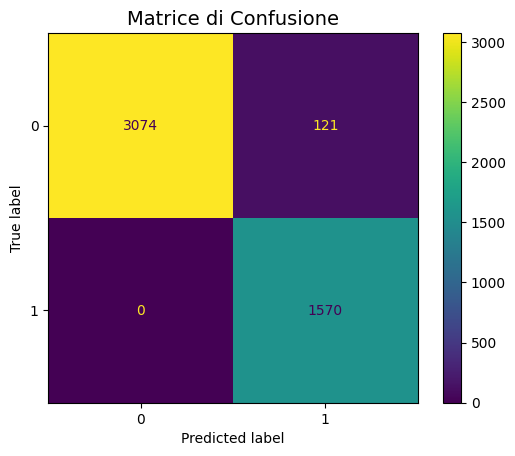

In [37]:
conf_matrix = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Matrice di Confusione', fontsize=14)
plt.show()

## K-means clustering per individuare cluster di viaggi con caratteristiche simili

In [38]:
# Selezioniamo le variabili per il clustering
clustering_data = data_clean[['trip_distance', 'fare_amount', 'tip_amount']]
# Standardizzazione dei dati
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

In [39]:
from sklearn.cluster import KMeans
# Calcoliamo la somma dei quadrati entro i cluster (WCSS)
wcss = []
for i in range(1, 10):
    kmeans = KMeans(i, random_state=42)
    kmeans.fit(clustering_data_scaled)
    wcss.append(kmeans.inertia_)
wcss

[71757.00000000003,
 33351.773593400976,
 27852.526588007684,
 20581.276342336358,
 16708.106140488257,
 14018.455220618902,
 11548.155098913432,
 10001.439874047284,
 8886.809375462151]

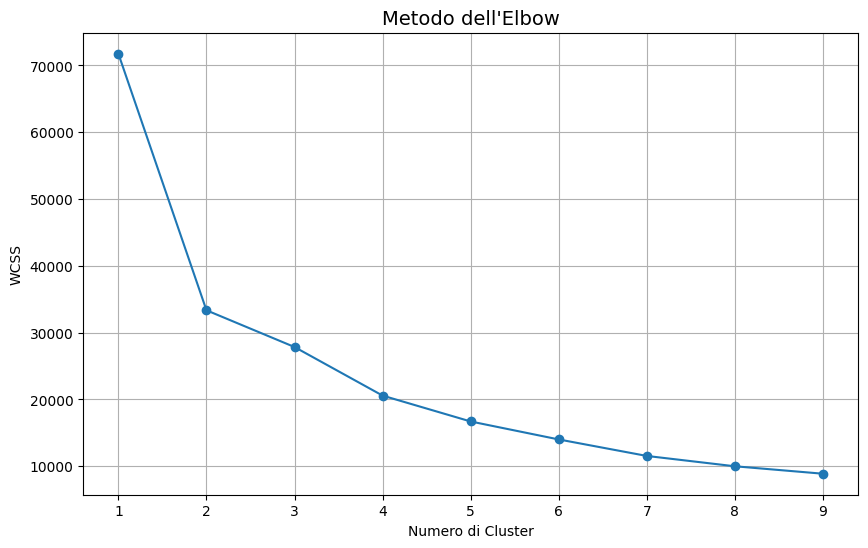

In [40]:
# Grafico del metodo dell'Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Metodo dell\'Elbow', fontsize=14)
plt.xlabel('Numero di Cluster')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [41]:
# Eseguiamo K-means con il numero ottimale di cluster
kmeans = KMeans(3, random_state=42)

# Aggiungiamo i cluster al dataframe originale
data_clean['cluster_pred'] = kmeans.fit_predict(clustering_data_scaled)

C:\Users\c3rn0\AppData\Local\Temp\ipykernel_28800\381632842.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['cluster_pred'] = kmeans.fit_predict(clustering_data_scaled)


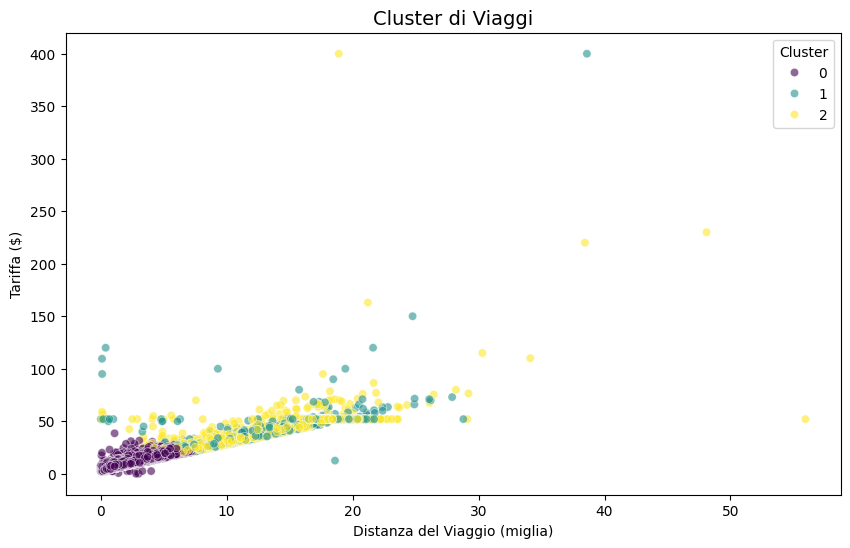

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=clustering_data['trip_distance'],
    y=clustering_data['fare_amount'],
    hue=data_clean['cluster_pred'],
    palette='viridis',
    alpha=0.6
)
plt.title('Cluster di Viaggi', fontsize=14)
plt.xlabel('Distanza del Viaggio (miglia)')
plt.ylabel('Tariffa ($)')
plt.legend(title='Cluster')
plt.show()

### Interpretazione:
##### Cluster 0: Potrebbe rappresentare viaggi brevi con tariffe basse.
##### Cluster 1: Potrebbe rappresentare viaggi lunghi con tariffe più alte.
##### Cluster 2: Potrebbe includere viaggi con mance elevate.

## Previsione con un Modello Avanzato (LSTM)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [44]:
# Raggruppamento per ora
time_series_data = data_clean.set_index('tpep_pickup_datetime').resample('H').size()

C:\Users\c3rn0\AppData\Local\Temp\ipykernel_28800\4097316372.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_series_data = data_clean.set_index('tpep_pickup_datetime').resample('H').size()


In [45]:
# Normalizzazione della serie temporale
time_series_scaled = scaler.fit_transform(time_series_data.values.reshape(-1, 1))

# Creazione di sequenze per LSTM
def input_label_split(data, time_steps=20):
    inputs, labels = [], []
    for i in range(len(data) - time_steps):
        inputs.append(data[i:i+time_steps])
        labels.append(data[i+time_steps])
    return np.array(inputs), np.array(labels)

time_steps=24 #Uso 24 ore come finestra

X, y = input_label_split(time_series_scaled, time_steps=time_steps)

# Divisione in train/test
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [46]:
# Costruzione del modello
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Previsione
y_pred = model.predict(X_test)

# Denormalizza i dati
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


Epoch 1/20


c:\Users\c3rn0\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9701   
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7768 
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7367 
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6371 
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4912 
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4926 
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4569 
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3803 
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3928 
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3814 
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3426 
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3732 
Epoch 13/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3395 
Epoch 14/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3391 
Epoch 15/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3286 
Epoch 16/20
1

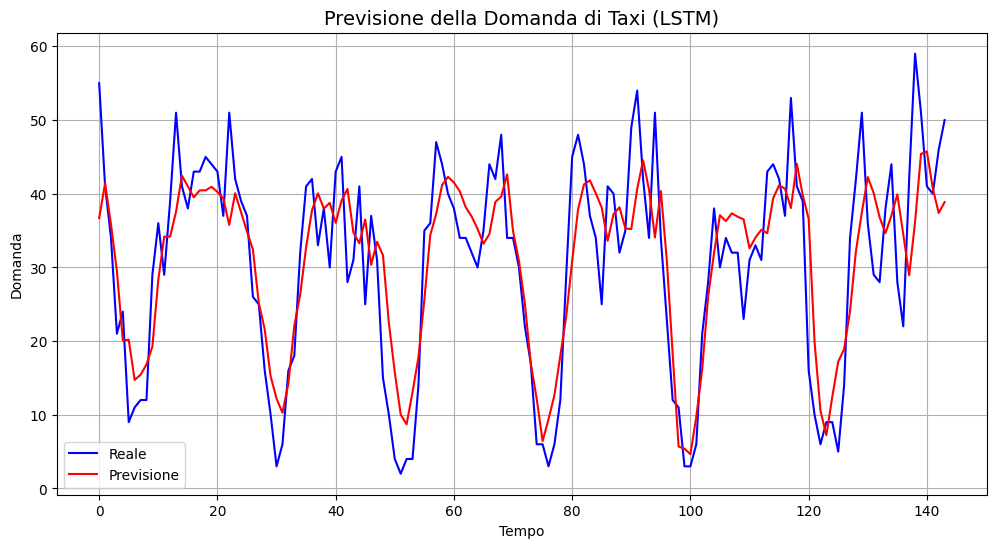

In [47]:
# Visualizza i risultati
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Reale', color='blue')
plt.plot(y_pred_rescaled, label='Previsione', color='red')
plt.title('Previsione della Domanda di Taxi (LSTM)', fontsize=14)
plt.xlabel('Tempo')
plt.ylabel('Domanda')
plt.legend()
plt.grid()
plt.show()